# yolo 物件偵測


In [ ]:
#複製yolov7的模型
!git clone https://github.com/WongKinYiu/yolov7

Cloning into 'yolov7'...
remote: Enumerating objects: 1094, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 1094 (delta 0), reused 2 (delta 0), pack-reused 1091
Receiving objects: 100% (1094/1094), 69.85 MiB | 28.01 MiB/s, done.
Resolving deltas: 100% (521/521), done.


In [ ]:
#安裝yolov7需要的package
%cd yolov7
!pip install -r requirements.txt

/content/yolov7
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 26.1 MB/s 


In [ ]:
#colab連接到GOOGLE Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#下載yolov7的權重檔
!gdown "https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt"

Downloading...
From: https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7.pt
To: /content/yolov7/yolov7.pt
100% 75.6M/75.6M [00:01<00:00, 72.1MB/s]


**檢視訓練資料集**

In [ ]:
#從Google Drive下載測試資料
! cp "/content/drive/MyDrive/1/Public_Testing_Dataset_v2.zip" /content/
! cp "/content/drive/MyDrive/1/Private_Testing_Dataset_v3.zip" /content/
! cp "/content/drive/MyDrive/1/Training_Dataset_v5.zip" /content/

In [ ]:
#資料解壓縮(測試檔)
! unzip /content/Public_Testing_Dataset_v2.zip > data_unzip.log
#資料解壓縮(訓練檔)
! unzip /content/Training_Dataset_v5.zip > data_unzip1.log

In [ ]:
#資料解壓縮(帶有密碼的測試檔)
! unzip -P 9TrlWw7x7gW -u /content/Private_Testing_Dataset_v3.zip -d /content/yolov7/public

Archive:  /content/Private_Testing_Dataset_v3.zip
  inflating: /content/yolov7/public/img1501.png  
  inflating: /content/yolov7/public/img1502.png  
  inflating: /content/yolov7/public/img1503.png  
  inflating: /content/yolov7/public/img1504.png  
  inflating: /content/yolov7/public/img1505.png  
  inflating: /content/yolov7/public/img1506.png  
  inflating: /content/yolov7/public/img1507.png  
  inflating: /content/yolov7/public/img1508.png  
  inflating: /content/yolov7/public/img1509.png  
  inflating: /content/yolov7/public/img1510.png  
  inflating: /content/yolov7/public/img1511.png  
  inflating: /content/yolov7/public/img1512.png  
  inflating: /content/yolov7/public/img1513.png  
  inflating: /content/yolov7/public/img1514.png  
  inflating: /content/yolov7/public/img1515.png  
  inflating: /content/yolov7/public/img1516.png  
  inflating: /content/yolov7/public/img1517.png  
  inflating: /content/yolov7/public/img1518.png  
  inflating: /content/yolov7/public/img1519.png  


In [ ]:
#觀察對應的標記檔
! cat /content/yolov7/train/img0001.txt

1,764,885,74,36
0,778,928,61,33
0,778,1001,63,24
3,1164,1043,8,23
3,1187,962,9,21
0,1160,901,26,58
0,1203,785,24,60
0,1409,824,52,48
3,1190,684,9,23
0,1163,565,22,47
0,1374,534,46,42
0,1392,502,54,27
0,1135,339,19,37
0,1199,238,16,34
0,1395,403,45,20
0,1384,383,46,20
0,1363,236,27,18
0,1358,201,43,20
0,1359,181,45,20
0,1340,112,44,23
0,1463,162,22,35
0,1404,78,20,36
0,1471,82,20,30
0,1496,85,21,29
0,1545,88,22,31
0,1566,87,24,34
0,1647,47,20,29
0,1798,52,21,31
0,1819,53,24,31
0,1754,1,20,23
0,1862,98,24,22
2,1189,686,10,10
2,1187,963,9,11
2,1161,1041,12,15
1,846,621,31,90
0,1627,47,20,25
0,1367,253,25,21
0,1370,275,27,20
0,1735,0,19,16
0,1776,0,26,16
0,1820,2,20,25


In [ ]:
#建立cfg_mask資料夾，用來存放訓練與測試資料所使用到的圖片的命名
! rm -rf /content/cfg_mask
! mkdir /content/cfg_mask

In [ ]:
#/content/yolov7/train中從取出前80%的資料，計算要取出多少資料trainLen
import os

datasets = [f for f in os.listdir('/content/yolov7/train') if not f.endswith('.txt')]
trainLen = int(len(datasets) * 0.8)
trainLen

FileNotFoundError: ignored

In [ ]:
#打開前80%的資料寫入train.txt
with open('/content/cfg_mask/train.txt', 'w') as f:
    
    f.write('\n'.join(datasets[0:trainLen]))

In [ ]:
#打開後20%的資料寫入test.txt
with open('/content/cfg_mask/test.txt', 'w') as f:
    
    f.write('\n'.join(datasets[trainLen:]))

In [ ]:
#建立img資料夾
! rm -rf /content/yolov7/train/images
! mkdir /content/yolov7/train/images

! rm -rf /content/yolov7/train/images/test
! mkdir /content/yolov7/train/images/test

! rm -rf /content/yolov7/train/images/val
! mkdir /content/yolov7/train/images/val

! rm -rf /content/yolov7/train/labels
! mkdir /content/yolov7/train/labels

! rm -rf /content/yolov7/train/labels/test
! mkdir /content/yolov7/train/labels/test

! rm -rf /content/yolov7/train/labels/val
! mkdir /content/yolov7/train/labels/val

In [ ]:
#將圖片與Bounding Box的標記檔複製進訓練資料夾裡
from bs4 import BeautifulSoup
import os
import shutil

labelpath = '/content/yolov7/train/'
imgpath = '/content/yolov7/train/'
yoloimgpath = '/content/yolov7/train/images/test/'
yololabelpath = '/content/yolov7/train/labels/test/'

f = open('/content/cfg_mask/train.txt','r')
a = f.readlines()

for imgname in a:
  labelname = imgname.rstrip('\n').replace("png","txt")
  shutil.copyfile(labelpath+ labelname, yololabelpath + labelname)
  shutil.copyfile(imgpath + imgname.rstrip('\n'), yoloimgpath + imgname.rstrip('\n'))


In [ ]:
#將圖片與Bounding Box標記檔放進測試資料夾裡
from bs4 import BeautifulSoup
import os
import shutil

labelpath = '/content/yolov7/train/'
imgpath = '/content/yolov7/train/'
yoloimgpath = '/content/yolov7/train/images/val/'
yololabelpath = '/content/yolov7/train/labels/val/'

f = open('/content/cfg_mask/test.txt','r')
a = f.readlines()

for imgname in a:
  labelname = imgname.rstrip('\n').replace("png","txt")  
  shutil.copyfile(labelpath+ labelname, yololabelpath + labelname)
  shutil.copyfile(imgpath + imgname.rstrip('\n'), yoloimgpath + imgname.rstrip('\n'))

In [ ]:
#將訓練資料裡的Bounding Box的標記檔歸一化
#歸一化後的x,y 代表該Bounding boxe的中心座標與圖片寬高的比值，是Bounding boxe歸一化後的中心座標
#歸一化後的w,h 代表該Bounding boxes的寬高與輸入圖像寬高的比值，是Bounding boxe歸一化後的寬高座標
from bs4 import BeautifulSoup
import os
import shutil

file_data = ""
size=[1920,1080]
bbox=[]
cbox=()

def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (float(box[0]) + float(box[0])+float(box[2]))/2.0
    y = (float(box[1]) + float(box[1])+float(box[3]))/2.0
    w = float(box[2])
    h = float(box[3])
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

for filename in os.listdir("/content/yolov7/train/labels/test"):

  with open(os.path.join("/content/yolov7/train/labels/test", filename), 'r') as f:
    for line in f:
      bbox=line.split(",")
      cbox=convert(size,bbox[1:])
      line = str(bbox[0])+" "+str(cbox[0])+" "+str(cbox[1])+" "+str(cbox[2])+" "+str(cbox[3])+"\n"
      file_data += line
  with open(os.path.join("/content/yolov7/train/labels/test", filename), "w") as f:
    f.write(file_data)   
  
  file_data = ""

In [ ]:
#觀察歸一化後的圖片對應的標記檔
! cat /content/yolov7/train/labels/test/img0001.txt

1 0.4171875 0.8361111111111111 0.03854166666666667 0.03333333333333333
0 0.42109375 0.8745370370370371 0.03177083333333333 0.030555555555555558
0 0.42161458333333335 0.937962962962963 0.0328125 0.022222222222222223
3 0.6083333333333333 0.976388888888889 0.004166666666666667 0.021296296296296296
3 0.6205729166666667 0.900462962962963 0.0046875 0.019444444444444445
0 0.6109375 0.8611111111111112 0.013541666666666667 0.053703703703703705
0 0.6328125 0.7546296296296297 0.0125 0.05555555555555556
0 0.7473958333333334 0.7851851851851852 0.027083333333333334 0.044444444444444446
3 0.6221354166666666 0.6439814814814815 0.0046875 0.021296296296296296
0 0.6114583333333333 0.5449074074074074 0.011458333333333333 0.04351851851851852
0 0.7276041666666666 0.513888888888889 0.02395833333333333 0.03888888888888889
0 0.7390625 0.47731481481481486 0.028125 0.025
0 0.59609375 0.33101851851851855 0.009895833333333333 0.03425925925925926
0 0.6286458333333333 0.23611111111111113 0.008333333333333333 0.03148

In [ ]:
##將測試資料裡的Bounding Box的標記檔歸一化
from bs4 import BeautifulSoup
import os
import shutil

file_data = ""
size=[1920,1080]
bbox=[]
cbox=()

def convert(size, box):
    dw = 1./size[0]
    dh = 1./size[1]
    x = (float(box[0]) + float(box[0])+float(box[2]))/2.0
    y = (float(box[1]) + float(box[1])+float(box[3]))/2.0
    w = float(box[2])
    h = float(box[3])
    x = x*dw
    w = w*dw
    y = y*dh
    h = h*dh
    return (x,y,w,h)

for filename in os.listdir("/content/yolov7/train/labels/val"):

  with open(os.path.join("/content/yolov7/train/labels/val", filename), 'r') as f:
    for line in f:
      bbox=line.split(",")
      cbox=convert(size,bbox[1:])
      line = str(bbox[0])+" "+str(cbox[0])+" "+str(cbox[1])+" "+str(cbox[2])+" "+str(cbox[3])+"\n"
      file_data += line
  with open(os.path.join("/content/yolov7/train/labels/val", filename), "w") as f:
    f.write(file_data)   
  
  file_data = ""

In [ ]:
#觀察歸一化後的圖片對應的標記檔
! cat /content/yolov7/train/labels/val/img0004.txt

0 0.8739583333333333 0.44537037037037036 0.025 0.020370370370370372
0 0.8666666666666667 0.6023148148148149 0.025 0.03425925925925926
0 0.5416666666666666 0.9009259259259259 0.03125 0.02962962962962963
0 0.5427083333333333 0.9666666666666667 0.027083333333333334 0.02592592592592593
0 0.9731770833333333 0.19398148148148148 0.0109375 0.030555555555555558
0 0.9598958333333333 0.18888888888888888 0.0125 0.02592592592592593
0 0.9158854166666667 0.25092592592592594 0.0140625 0.031481481481481485
0 0.8765625 0.5625 0.029166666666666667 0.026851851851851852
0 0.7671875 0.2972222222222222 0.010416666666666666 0.02777777777777778
0 0.8638020833333333 0.3189814814814815 0.0171875 0.019444444444444445
1 0.5390625 0.8606481481481482 0.036458333333333336 0.03796296296296296
0 0.8645833333333334 0.3416666666666667 0.015625 0.018518518518518517
0 0.9171874999999999 0.1736111111111111 0.016666666666666666 0.028703703703703703
0 0.9330729166666667 0.17916666666666667 0.013020833333333334 0.0287037037037

In [ ]:
#從Google Drive下載yaml設定檔
! cp "/content/drive/MyDrive/1/flight.yaml" /content/yolov7/data

flight.yaml

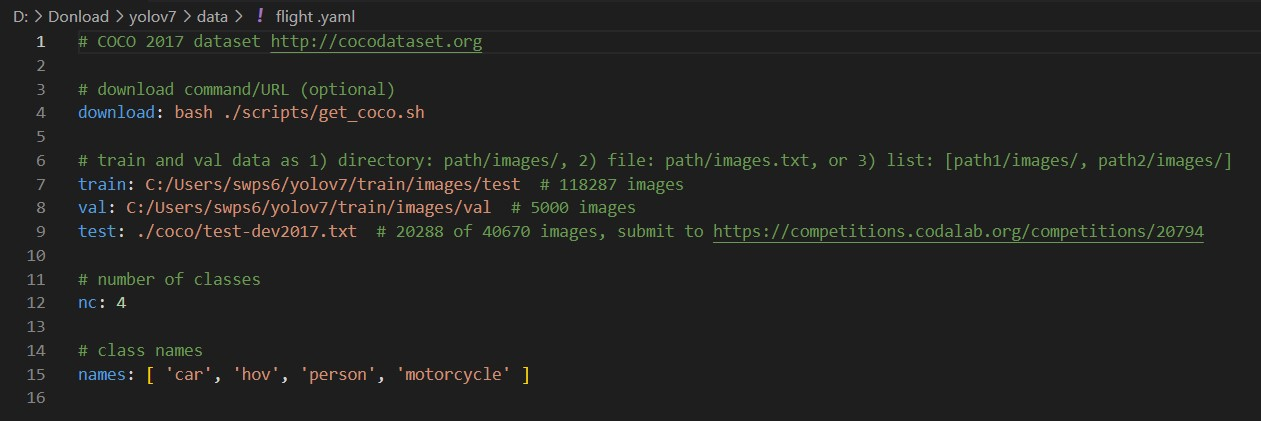

In [ ]:
#如果有之前訓練好的權重，可以從Google Drive下載，從這個開始繼續訓練
#例如：訓練500個epoch會超過colab的容限，可以100個100個epoch訓練
! cp "/content/drive/MyDrive/1/runs/train/exp11/weights/best.pt" /content/yolov7

In [ ]:
from google.colab import files
files.download("/content/yolov7/runs/train/exp2/weights/best.pt")

# Traing

In [ ]:
!python train.py --weights /content/yolov7/last.pt --data data/flight.yaml --epochs 700 --batch-size 4 --img-size 416 416 --project /content/drive/MyDrive/1/runs/train

YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=4, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='data/flight.yaml', device='', entity=None, epochs=700, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='/content/drive/MyDrive/1/runs/train', quad=False, rect=False, resume=False, save_dir='/content/drive/MyDrive/1/runs/train/exp11', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=4, upload_dataset=False, v5_metric=False, weights='/content/yolov7/last.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir /content/drive/MyDrive/1/runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_

In [ ]:
#weights：使用/content/yolov7/yolov7.pt(訓練使用yolo v7，作者訓練好的權重)
!python train.py --weights /content/yolov7/yolov7.pt

YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='data/flight .yaml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp2', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='/content/yolov7/yolov7.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1

In [ ]:
!python train.py --weights /content/yolov7/runs/train/exp2/weights/best.pt

YOLOR 🚀 v0.1-115-g072f76c torch 1.12.1+cu113 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=16, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='data/flight .yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, freeze=[0], global_rank=-1, hyp='data/hyp.scratch.p5.yaml', image_weights=False, img_size=[416, 416], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp3', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=16, upload_dataset=False, v5_metric=False, weights='/content/yolov7/runs/train/exp2/weights/best.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
hyperparameters: lr0=0.01, lrf=0.1, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=

In [ ]:
from google.colab import files
files.download("/content/yolov7/runs/train/exp4/weights/best.pt")

In [ ]:
!python detect.py --weights /content/yolov7/best.pt --conf 0.3 --source /content/yolov7/public --img-size 640 --project /content/drive/MyDrive/1/runs/detect

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.3, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', no_trace=False, nosave=False, project='/content/drive/MyDrive/1/runs/detect', save_conf=False, save_txt='True', source='/content/yolov7/public', update=False, view_img=False, weights=['/content/yolov7/best.pt'])
YOLOR 🚀 v0.1-116-g8c0bf3f torch 1.12.1+cu113 CPU

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
/usr/local/lib/python3.8/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 306 layers, 36496081 parameters, 6194944 gradients, 103.2 GFLOPS
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

36 cars, 1 motorcycle

In [ ]:
#將訓練後的標記好Bounding Box反歸一化回像素與座標

from bs4 import BeautifulSoup
import os
import shutil

file_data = ""
size=[1920,1080]
bbox=[]
cbox=()
line_seen=set()

def convert(size, box):
    dw = size[0]
    dh = size[1]
    x = float(box[0])*2*dw
    y = float(box[1])*2*dh
    w = float(box[2])
    h = float(box[3])
    w = (w*dw)
    x = ((x-w)/2.0)
    h = (h*dh)
    y = ((y-h)/2.0)
    return (x,y,w,h)


for filename in os.listdir("/content/drive/MyDrive/1/runs/detect/exp/labels"):
  with open(os.path.join("/content/drive/MyDrive/1/runs/detect/exp/labels/",filename),"r") as f:
   
    for line in f.readlines():
      if line != '\n':
        bbox=line.split(" ")
        cbox=convert(size,bbox[1:])
        line = str(bbox[0])+" "+str(cbox[0])+" "+str(cbox[1])+" "+str(cbox[2])+" "+str(cbox[3])+"\n"

      if line not in line_seen:
        line_seen.add(line)
        file_data += line
    line_seen.clear()
  
  with open(os.path.join("/content/drive/MyDrive/1/runs/detect/exp/labels/", filename), "w") as f:
    f.write(file_data)   
  
  file_data = ""


In [ ]:
#因為是要提交包含所有圖片檔的標記的csv檔
#將所有圖片的標記檔合併進excel檔案(labels.csv)中

import csv
from csv import writer
from bs4 import BeautifulSoup
import os
import shutil

line_seen=set()

'''
先測試看看單寫一個圖片檔寫進csv檔
with open(os.path.join("/content/drive/MyDrive/1/runs/detect/exp/labels/img1500.txt"),"r") as f:
         
    for line in f.readlines():
      if line not in line_seen and line != '\n':
        line_seen.add(line)
        bbox=line.split(" ")
      with open(os.path.join("/content/drive/MyDrive/1/runs/detect/exp/labels.csv"),"a+") as r:
        write = csv.writer(r)
        write.writerow('')
        write.writerow([filename,str(bbox[0]),str(bbox[1]),str(bbox[2]),str(bbox[3]),str(bbox[4]).rstrip()])
    line_seen.clear()
'''
for filename in os.listdir("/content/drive/MyDrive/1/runs/detect/exp/labels"):
  with open(os.path.join("/content/drive/MyDrive/1/runs/detect/exp/labels/",filename),"r") as f:
         
    for line in f.readlines():
      if line not in line_seen and line != '\n':
        line_seen.add(line)
        bbox=line.split(" ")
      with open(os.path.join("/content/drive/MyDrive/1/runs/detect/exp/labels.csv"),"a+") as r:
        write = csv.writer(r)
        write.writerow([filename.rstrip(".txt"),str(bbox[0]),int(cbox[0]),int(cbox[1]),int(cbox[2]),int(cbox[3])])
    line_seen.clear()
